In [142]:
import os, time, glob, socket
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import pickle
random.seed(123)
from sklearn.linear_model import Lasso
import seaborn as sns
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [107]:
path = r"/Users/texin/Documents/大四下/機器學習"
X = pd.read_csv(path + r"/期末報告/house-prices-advanced-regression-techniques/X_train.csv",index_col=0)

In [104]:
path = r"/Users/texin/Documents/大四下/機器學習"
X_pred = pd.read_csv(path + r"/期末報告/house-prices-advanced-regression-techniques/X_test.csv",index_col=0)

In [108]:
path = r"/Users/texin/Documents/大四下/機器學習"
y = pd.read_csv(path + r"/期末報告/house-prices-advanced-regression-techniques/y_train.csv",index_col=0)

In [106]:
path = r"/Users/texin/Documents/大四下/機器學習"
y_pred = pd.read_csv(path + r"/期末報告/house-prices-advanced-regression-techniques/sample_submission.csv",index_col=0)

In [109]:
print(X.shape)
print(X_pred.shape)
print(y.shape)
print(y_pred.shape)

(1460, 239)
(1459, 239)
(1460, 1)
(1459, 1)


# Lasso

In [110]:
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge,RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

In [111]:
# LASSO交叉检验 cv=10
lassocv = LassoCV(alphas=None, copy_X=True, cv=10, eps=0.0001, fit_intercept=True,
    max_iter=50000, n_alphas=1000, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,verbose=False)

lassocv.fit(X, y)


# 最佳的alpha
lasso_best_alpha = lassocv.alpha_
print('最佳的alpha : ',lasso_best_alpha)

# 估計係數個數
print('估計係數個數 : ',len(lassocv.coef_ ))

# 非0的係數個數
print('非0的係數個數 : ',np.sum(lassocv.coef_ != 0))

/Users/texin/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


最佳的alpha :  137.31376900358177
估計係數個數 :  239
非0的係數個數 :  83


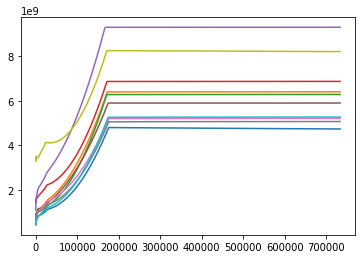

In [37]:
plt.plot(lassocv.alphas_,lassocv.mse_path_)

In [39]:
# 選最佳的alpha 訓練 model
# 基於最佳lambda值建模
lasso_model=Lasso(alpha =  lasso_best_alpha,max_iter = 50000,tol = 0.0001, normalize=False)
lasso_model.fit(X,y)

Lasso(alpha=137.31376900358177, copy_X=True, fit_intercept=True, max_iter=50000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [199]:
## predict_y
lasso_pred=lassocv.predict(X_pred)
lasso_pred=lasso_pred.flatten()

In [201]:
# 對答案
print('MSLE为：',MSLE(y_pred,lasso_pred))  #Rmse

MSLE为： 0.17692630300263928


# ridge

In [44]:
from sklearn.linear_model import RidgeCV

In [139]:
alphas=[1e-3, 1e-2, 1e-1, 1.0, 10.0, 20,30,40 ,50 ,100]
ridgecv = RidgeCV(alphas=alphas,store_cv_values=True)  # 通过RidgeCV可以设置多个参数值，算法使用交叉验证获取最佳参数值
ridgecv.fit(X, y)   # 线性回归建模
# print('系数矩阵:\n',model.coef_)
# print('线性回归模型:\n',model)
print('交叉验证最佳alpha值',ridgecv.alpha_)  # 只有在使用RidgeCV算法时才有效
# 使用模型预测
#y_predicted = model.predict(X_test)
#plt.scatter(X_train, y_train, marker='o',color='green',label='训练数据')


交叉验证最佳alpha值 20.0


In [132]:
cv_mse = np.mean(ridgecv.cv_values_, axis=0)
print("alphas: %s" % alphas)
print("CV MSE: %s" % cv_mse)
print("Best alpha using built-in RidgeCV: %f" % ridgecv.alpha_)

alphas: [0.001, 0.01, 0.1, 1.0, 10.0, 20, 50, 100]
CV MSE: [[1.28252030e+09 1.27779483e+09 1.24488500e+09 1.18611801e+09
  1.16431581e+09 1.16208622e+09 1.17230817e+09 1.18752195e+09]]
Best alpha using built-in RidgeCV: 20.000000


In [145]:
# generate the prediction using the best model
ridge = Ridge(alpha=ridgecv.alpha_,max_iter = 50000,tol = 0.0001)
ridge.fit(X, y)

Ridge(alpha=20.0, copy_X=True, fit_intercept=True, max_iter=50000,
      normalize=False, random_state=None, solver='auto', tol=0.0001)

In [148]:
## predict_y
ridge_pred=ridge.predict(X_pred)
ridge_pred=ridge_pred.flatten()

In [196]:
from sklearn.metrics import mean_squared_log_error as MSLE

In [197]:
# 對答案
print('MSLE为：',MSLE(y_pred,ridge_pred))  

MSLE为： 0.19023160271116712


# Decision tree

In [168]:
from sklearn.tree import DecisionTreeRegressor

In [179]:
dt_gsc = GridSearchCV(DecisionTreeRegressor(random_state=0),
              param_grid={
                  'min_samples_split': range(2, 10),
                  'max_depth': range(3,7)},
              scoring='neg_mean_squared_error', verbose=0,n_jobs=-1, cv=5, refit=True)

In [180]:
dt_gsc.fit(X, y)
dt_gsc.best_params_

{'max_depth': 5, 'min_samples_split': 2}

In [183]:
dt = DecisionTreeRegressor(random_state=0, criterion="mse",max_depth=dt_gsc.best_params_["max_depth"],
                           min_samples_split=dt_gsc.best_params_["min_samples_split"])
dt_scores = cross_val_score(dt, X, y, cv=10,scoring='neg_mean_squared_error')


In [184]:
print(dt_scores.mean())

-1788594824.531435


In [185]:
dt_fit = dt.fit(X, y)

In [193]:
## predict_y

dt_pred=dt.predict(X_pred)
dt_pred=dt_pred.flatten()


In [202]:
print('MSLE为：',MSLE(y_pred,dt_pred)) 

MSLE为： 0.12855567127666576


# Random forest

In [150]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler

In [157]:
# Perform Grid-Search
gsc = GridSearchCV(
    estimator=RandomForestRegressor(),param_grid={
            'max_depth': range(3,7),
            'n_estimators': (10, 50, 100, 1000)
        }
        ,cv=5, scoring='neg_mean_squared_error', verbose=0,n_jobs=-1)

In [158]:
grid_result = gsc.fit(X, y)
best_params = grid_result.best_params_

/Users/texin/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [160]:
best_params

{'max_depth': 6, 'n_estimators': 1000}

In [164]:
rfr = RandomForestRegressor(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"],
                            random_state=False, verbose=False)
# Perform K-Fold CV
scores = cross_val_score(rfr, X, y, cv=10, scoring='neg_mean_squared_error')

/Users/texin/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/texin/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/texin/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/texin/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:

In [165]:
print(scores.mean())

-912703207.2489941


In [167]:
rfr.fit(X, y)

/Users/texin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=6, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=False, verbose=False, warm_start=False)

In [191]:
## predict_y

rfr_pred=rfr.predict(X_pred)
rfr_pred=rfr_pred.flatten()

In [203]:
print('MSLE为：',MSLE(y_pred,rfr_pred)) 

MSLE为： 0.1271474452659243
